In [1]:
%cd ..

/Users/maimai/Desktop/project/May


In [2]:
import builtins
builtins.uclresearch_topic = 'GIVENCHY'
# builtins.uclresearch_topic = 'HAWKING'
# builtins.uclresearch_topic = 'NYC'
# builtins.uclresearch_topic = 'FLORIDA'
from configuration import config
from configuration import dzcnapy_plotlib as dzcnapy


from tqdm import tqdm
import os
import pickle
import math
import numpy as np
import networkx as nx
import pandas as pd
from collections import Counter
import operator

# Plotting
import matplotlib
# # matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Networkx
from networkx.drawing.nx_agraph import graphviz_layout



('Reading config file from location: '
 '/Users/maimai/Desktop/project/May/configuration/env.properties')
{'calculate': {'analysis': True,
               'network': True,
               'uniquetweets': True,
               'uniqueusers': True},
 'data': {'dates': ['2018-03-11', '2018-03-12', '2018-03-13'],
          'eventname': "Givenchy's Death",
          'phrases': ['givenchy%20death', 'givenchy%20passed%20away'],
          'starttime': 'Mar 12 08:20:00 -0500 2018'},
 'path': {'crawl': {'followers': '/Users/maimai/Desktop/project/May/followers',
                    'friends': '/Users/maimai/Desktop/project/May/friends'},
          'cwd': '/Users/maimai/Desktop/project/May/data/givenchy',
          'ml': '/Users/maimai/Desktop/project/May/data/givenchy/pickle',
          'networkx': {'all': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_all.dat',
                       'friends': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_friends.dat',
       

In [3]:
n_bytes = 2**31
max_bytes = 2**31 - 1

path = "/Users/maimai/Desktop/project/May/data/givenchy/pickle"  

def write_to_pickle(file_path, data):

    bytes_out = pickle.dumps(data)
    with open(file_path, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])

def load_pickle(file_path):
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    return pickle.loads(bytes_in)



In [4]:

project_name = config.settings['data']['eventname']
timeframe = config.settings['timeframe']
save_to_file = config.settings['save_to_file'] == 'True'
window = 30
# unique_users = config.load_users_dataframe()
# users = load_pickle(path+'/users.dat')
# network_friends = config.load_networkx_friends()
# network_potential = config.load_networkx_potential()
users = load_pickle(path+'/users.dat')

In [5]:
unique_users = load_pickle(path+'/Stanford_network_simulation_0.6_c_new.pkl')
# users

In [6]:
unique_users['user']=users['screen_name']
unique_users['source_index'] = None

for i in range(len(unique_users)):
    source_id = unique_users.loc[i,'source_id']
 
    source_index = unique_users[unique_users.user_id.isin([source_id])].index.values
#     print(source_index)
    if len(source_index) != False:
        unique_users.loc[i,'source_index']=int(source_index)
        unique_users.loc[i,'time_since_seed']=unique_users.loc[i,'time_lapsed']-unique_users.loc[int(source_index),'time_lapsed']
#         print(i)
unique_users


,t_current,user_id,source_candidates,infec_candidates,followers_count,friends_count,source_id,seed_user_id,SIR,generations,time_lapsed,time_since_seed,user,source_index
0,30,214328887,"[105, 62, 147, 148, 42, 124, 32, 10, 96, 18, 1...","[1, 83, 70, 16, 40, 4, 76, 113, 156, 75, 39, 6...",2090,46,214328887,214328887,1,0,0,0,xsolnechnaya,0
1,30,34428380,"[0, 12, 11, 110, 33, 118, 167, 78, 18, 74, 90,...","[51, 34, 93, 9, 58, 72, 135, 149, 1801, 2947, ...",305257,181,83250127,83250127,1,1,4,4,schzimmydeanie,1750
2,30,17116707,"[18, 56, 52, 111, 153, 97, 38, 35, 31, 169, 20...","[3, 82, 125, 113, 39, 62, 116, 70, 124, 58, 14...",11756,498,254839786,76576753,1,4,5,1,paramorespain,32
3,30,28465635,"[2, 111, 36, 158, 83, 118, 179, 148, 65, 130, ...","[161, 38, 86, 76, 12, 84, 72, 141, 100, 8, 53,...",57992,1482,28176041,76576753,1,3,4,1,paramorebrasil,24761
4,30,380580781,"[18, 96, 35, 0, 66, 32, 156, 75, 55, 54, 25, 4...","[5, 87, 51, 140, 33, 22, 72, 58, 47, 10, 83, 6...",15033,219,254839786,76576753,1,4,5,1,SWEparamore,32
5,30,18996905,"[4, 64, 42, 173, 66, 155, 153, 112, 43, 156, 2...","[63, 129, 9, 1, 72, 4170, 14875, 18521, 14885,...",284075,68,214328887,214328887,1,1,5,5,FueledByRamen,0
6,30,221036078,"[148, 8, 83, 68, 46, 0, 124, 113, 116, 33, 31,...","[7, 72, 52, 81, 118, 114, 56, 86, 37, 53, 41, ...",2121,206,214328887,214328887,1,1,5,5,paramoreDomRep,0
7,30,153460275,"[6, 115, 31, 23, 82, 62, 44, 18, 20, 173, 14, ...","[84, 75, 72, 1, 10, 125, 9, 5, 18471, 18503, 1...",4710,35,100318079,76576753,1,3,4,1,Paramorefansde,338
8,30,107830991,"[10, 61, 35, 28, 41, 56, 52, 3, 49, 113, 69, 9...","[9, 58, 20, 77, 54, 6, 31, 43, 165, 21, 153, 3...",11627,934,28465635,76576753,1,4,5,1,paramoreCL,3
9,30,17868918,"[8, 87, 123, 20, 37, 16, 66, 95, 80, 111, 69, ...","[51, 39, 81, 93, 58, 122, 72, 144, 4159, 4170,...",16996,552,254839786,76576753,1,4,5,1,adamsamiljan,32


In [7]:
write_to_pickle(path+'/Stanford_network_simulation_c_new_plot.pkl', unique_users)

In [8]:
# deleted_line = list(unique_users[unique_users.generations.isnull().values==True].index.values)
# all_line = list(unique_users.index.values)
# all_line.removeAll(deleted_line)
# all_line
a=[0,1,2,3,4,5]
unique_users=unique_users[unique_users.generations.isin(a)]
# unique_users.index[14]

In [9]:
network_all = nx.DiGraph()
for i in tqdm(range(len(unique_users))):
    index = unique_users.index[i]
    network_all.add_node(index,
                         user = unique_users.loc[index, 'user'],
                         user_id = unique_users.loc[index, 'user_id'],
                         time_lapsed = unique_users.loc[index, 'time_lapsed'],
                         followers_count = unique_users.loc[index, 'followers_count'],
                         friends_count = unique_users.loc[index, 'friends_count'],
                         generation = unique_users.loc[index, 'generations'],
                         time_since_seed = unique_users.loc[index, 'time_since_seed'],
                        )
    source_index = unique_users.loc[index, 'source_index']
#     if source_index is not None:
    network_all.add_edge(source_index, index)
network_all

100%|██████████| 26526/26526 [00:03<00:00, 7836.80it/s]


In [10]:
def get_colors(depth):
    return sns.cubehelix_palette(depth, start=3, rot=1, reverse=True)
    sns.palplot(colors)
    
def plot_network(graph, title):
    plt.axis('off')
    pos = graphviz_layout(graph)
    nx.draw_networkx(graph, pos=pos, with_labels=False, **dzcnapy.small_attrs)
    depth = max(nx.get_node_attributes(graph,'generation').values()) + 1
    colors = get_colors(depth)
    color = [colors[graph.node[n]["generation"]] for n in graph]
    dzcnapy.small_attrs["node_color"] = color
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.set_extent(pos, plt)
    dzcnapy.plot(title, [15, 12], save=True)

/Applications/anaconda3/lib/python3.6/site-packages/pygraphviz/agraph.py:1341: RuntimeWarning: Warning: Could not load "/Applications/anaconda3/lib/graphviz/libgvplugin_pango.6.dylib" - file not found

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


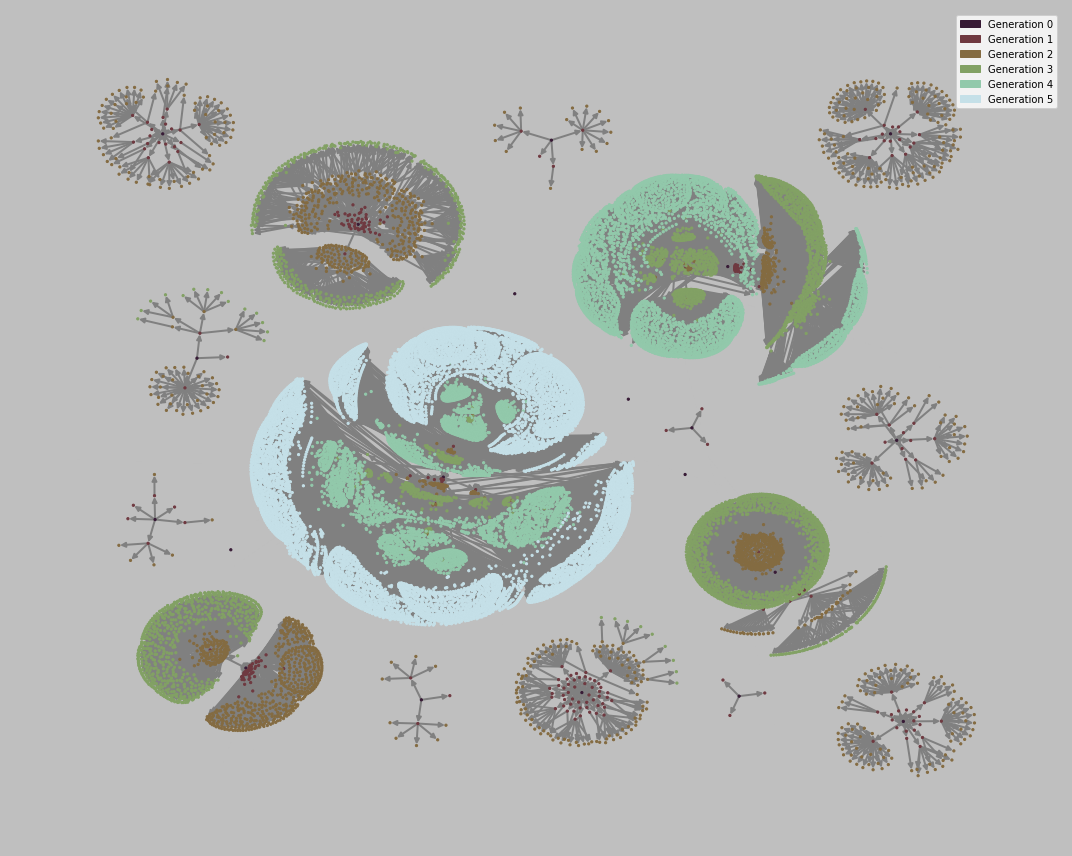

In [13]:
plot_network(network_all, "Sequential-seeding Strategy (c-new)")

In [12]:
# results_path = "/Users/maimai/Desktop/project/May/data/givenchy/pickle"
# title="Visualization of the entire network for event Givenchy's death"
# # plt.savefig(results_path+"/models.pdf")
# # plt.savefig("{}/{}.pdf".format(results_path, fname), dpi=600)
# dzcnapy.plot(network_all, [15, 12], save=)